# Importing the Dataset

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
df=pd.read_csv("mammographic_masses.data.txt")

In [149]:
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [150]:
df=pd.read_csv("mammographic_masses.data.txt",na_values='?',names=['BI_RAIDS','AGE','SHAPE','MARGIN','DENSITY','SEVERITY'],usecols=range(0,6))
df.head()

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [ ]:
#6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

#BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
#Age: patient's age in years (integer)
#Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
#Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
#Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
#Severity: benign=0 or malignant=1 (binominal, goal field!)

In [151]:
df.describe()

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [152]:
df.dtypes

BI_RAIDS    float64
AGE         float64
SHAPE       float64
MARGIN      float64
DENSITY     float64
SEVERITY      int64
dtype: object

# Finding the Null Values in each column

In [153]:
print("the number of Null values per feature:")
df.isnull().sum()

the number of Null values per feature:


BI_RAIDS     2
AGE          5
SHAPE       31
MARGIN      48
DENSITY     76
SEVERITY     0
dtype: int64

In [154]:
df.shape

(961, 6)

In [155]:
df.loc[(df['AGE'].isnull())| 
       (df['SHAPE'].isnull())| 
       (df['MARGIN'].isnull())|
       (df['DENSITY'].isnull())]

,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


# Filling Missing Values

In [156]:
df1=df
df1['BI_RAIDS']=df1['BI_RAIDS'].fillna(method="ffill")
print(df1['BI_RAIDS'].isnull().sum())
df1
df1.to_csv("mammogram.csv")

0


In [157]:
df1=df
df1['AGE']=df1['AGE'].fillna(method="ffill")
print(df1['AGE'].isnull().sum())
df1
df1.to_csv("mammogram.csv", index=True)

0


In [158]:
df1=df
df1['SHAPE']=df1['SHAPE'].fillna(method="ffill")
print(df1['SHAPE'].isnull().sum())
df1
df1.to_csv("mammogram.csv")

0


In [159]:
df1=df
df1['MARGIN']=df1['MARGIN'].fillna(method="ffill")
print(df1['MARGIN'].isnull().sum())
df1
df1.to_csv("mammogram.csv")

0


In [160]:
df1=df
df1['DENSITY']=df1['DENSITY'].fillna(method="ffill")
print(df1['DENSITY'].isnull().sum())
df1
df1.to_csv("mammogram.csv")

0


In [161]:
df=pd.read_csv("mammogram.csv")

In [162]:
print("the number of Null values per feature:")
df.isnull().sum()

the number of Null values per feature:


Unnamed: 0    0
BI_RAIDS      0
AGE           0
SHAPE         0
MARGIN        0
DENSITY       0
SEVERITY      0
dtype: int64

In [163]:
df['AGE']=pd.to_numeric(df['AGE'], downcast='integer')
df['BI_RAIDS']=pd.to_numeric(df['BI_RAIDS'], downcast='integer')
df['SHAPE']=pd.to_numeric(df['SHAPE'], downcast='integer')
df['MARGIN']=pd.to_numeric(df['MARGIN'], downcast='integer')
df['DENSITY']=pd.to_numeric(df['DENSITY'], downcast='integer')
df.head()

,Unnamed: 0,BI_RAIDS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,0,5,67,3,5,3,1
1,1,4,43,1,1,3,1
2,2,5,58,4,5,3,1
3,3,4,28,1,1,3,0
4,4,5,74,1,5,3,1


In [164]:
df.shape

(961, 7)

# How each of the features is distributed.

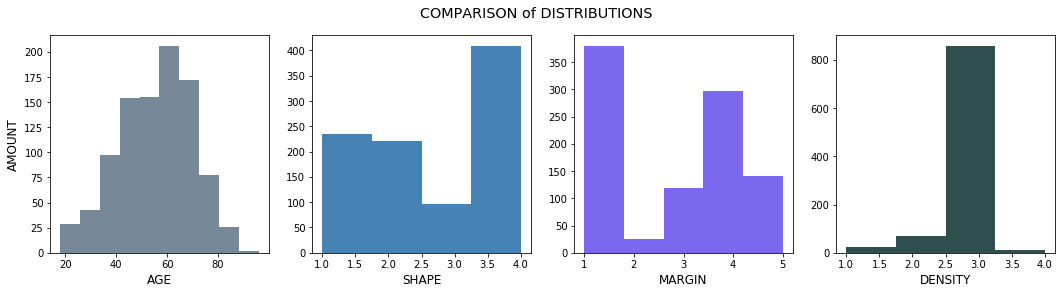

In [165]:
fig, axes = plt.subplots(1,4, sharey=False, figsize=(18,4))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.hist(df['AGE'], bins=10, color="lightslategray")
ax2.hist(df['SHAPE'], bins=4, color="steelblue")
ax3.hist(df['MARGIN'], bins=5, color="mediumslateblue")
ax4.hist(df['DENSITY'], bins=4, color="darkslategray")
ax1.set_xlabel('AGE', fontsize="large")
ax2.set_xlabel('SHAPE', fontsize="large")
ax3.set_xlabel('MARGIN', fontsize="large")
ax4.set_xlabel('DENSITY', fontsize="large")
ax1.set_ylabel("AMOUNT", fontsize="large")

plt.suptitle('COMPARISON of DISTRIBUTIONS', ha='center', fontsize='x-large')
plt.show()

In [166]:
df['SEVERITY'].value_counts()

0    516
1    445
Name: SEVERITY, dtype: int64

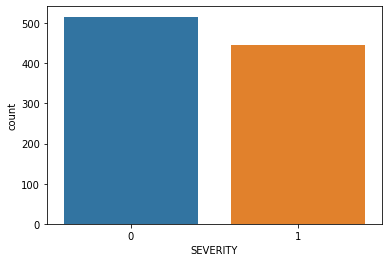

In [167]:
sns.countplot(df['SEVERITY'],label='count')

In [168]:
all_f=df[['AGE','SHAPE','MARGIN','DENSITY']].values
classes=df['SEVERITY'].values
f_name=['AGE','SHAPE','MARGIN','DENSITY']
all_f

array([[67,  3,  5,  3],
       [43,  1,  1,  3],
       [58,  4,  5,  3],
       ...,
       [64,  4,  5,  3],
       [66,  4,  5,  3],
       [62,  3,  3,  3]], dtype=int8)

#Some of the models require the input data to be normalized.
#So we'll normalize the attribute data (by preprocessing.standardscaler().

# Normalizing the Numeric Column : Age

In [169]:
f=df[['AGE']].values
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
df['age_s']=scaler.fit_transform(f)
print("Scaled features:")
features_scaled=df[['age_s','SHAPE','MARGIN','DENSITY']].values
features_scaled

Scaled features:


array([[6.28205128, 3.        , 5.        , 3.        ],
       [3.20512821, 1.        , 1.        , 3.        ],
       [5.12820513, 4.        , 5.        , 3.        ],
       ...,
       [5.8974359 , 4.        , 5.        , 3.        ],
       [6.15384615, 4.        , 5.        , 3.        ],
       [5.64102564, 3.        , 3.        , 3.        ]])

#Divide the dataset as 75% for training and 25% for testing

In [170]:
import numpy  
from sklearn.model_selection import train_test_split

(x_train,x_test, y_train, y_test)=train_test_split(features_scaled, classes, train_size=0.75,random_state=1)

In [171]:
list_of_accuracies = {}

# Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [173]:
clf.score(x_test, y_test)

0.7095435684647303

#Nnow instead of a single train/test split, we can use K-fold cross validation to get better measure of our model's 
#accuracy(k=10). So, we use model_selection.cross_val_score.

In [174]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
cv_scores.mean()

0.7378006872852233

In [175]:
list_of_accuracies['decisiontree'] = cv_scores.mean()

Text(0.5, 1.0, 'Decision Tree')

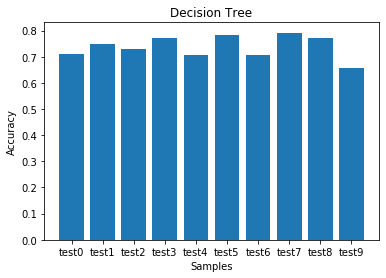

In [176]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title("Decision Tree")

# RandomForestClassifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=1)
clf.fit(x_train, y_train)
cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
cv_scores.mean()

0.7565399484536083

In [178]:
list_of_accuracies['randomforest'] = cv_scores.mean()

Text(0.5, 1.0, 'Random Forest')

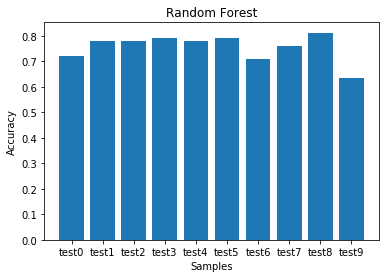

In [179]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title("Random Forest")

# KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knnpred= knn.predict(x_test)
    error_rate.append(np.mean(knnpred != y_test))

Text(0, 0.5, 'Error Rate')

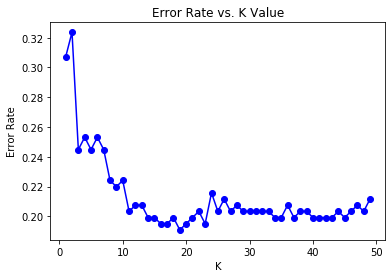

In [181]:
import matplotlib.pyplot as plt
plt.plot(range(1,50),error_rate,color='blue',marker="o")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [182]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier(n_neighbors=39)
clf.fit(x_train, y_train)
cv_scores=cross_val_score(clf,features_scaled,classes,cv=10)
cv_scores.mean()

0.7950386597938144

In [183]:
list_of_accuracies['knn'] = cv_scores.mean()

Text(0.5, 1.0, 'KNN')

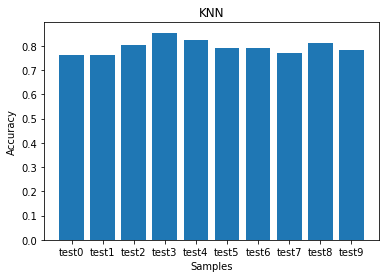

In [184]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title("KNN")

# Naive Bayes

In [185]:
from sklearn.naive_bayes import MultinomialNB
scaler=MultinomialNB()
scaler.fit(x_train, y_train)
cv_scores=cross_val_score(scaler,features_scaled,classes,cv=10)
cv_scores.mean()

0.7669458762886597

In [186]:
list_of_accuracies['mnb'] = cv_scores.mean()

Text(0.5, 1.0, 'Naive Bayes MNB')

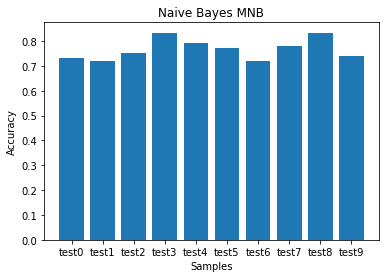

In [187]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title("Naive Bayes MNB")

In [188]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
cv_scores=cross_val_score(classifier,features_scaled,classes,cv=10)
cv_scores.mean()

0.7888101374570446

In [189]:
list_of_accuracies['gnb'] = cv_scores.mean()

Text(0.5, 1.0, 'Naive Bayes GNB')

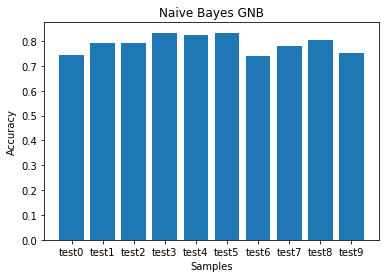

In [190]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title("Naive Bayes GNB")

# SVM

In [191]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)
cv_scores=cross_val_score(svc,features_scaled,classes,cv=10)
cv_scores.mean()
#hyperplain: cutting data vertically and horizontally and place it in 3d into boxes into hyperplain .. and find the best fit line among the upper level and lower level.

0.8064647766323023

In [192]:
list_of_accuracies['svm'] = cv_scores.mean()

Text(0.5, 1.0, 'SVM')

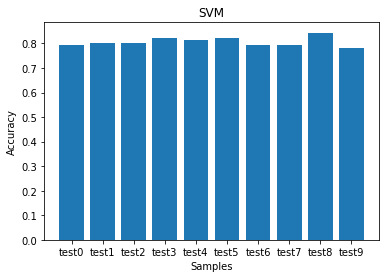

In [193]:
plt.bar(['test' + str(i) for i in range(len(cv_scores))], cv_scores)
plt.xlabel('Samples')
plt.ylabel('Accuracy')
plt.title("SVM")

In [194]:
list_of_accuracies

{'decisiontree': 0.7378006872852233,
 'randomforest': 0.7565399484536083,
 'knn': 0.7950386597938144,
 'mnb': 0.7669458762886597,
 'gnb': 0.7888101374570446,
 'svm': 0.8064647766323023}

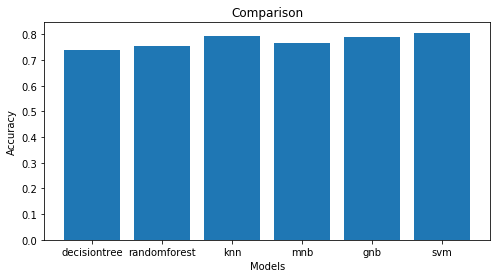

In [195]:
plt.figure(figsize=(8, 4))
plt.bar(list_of_accuracies.keys(), list_of_accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Comparison")
plt.savefig('final_plot.png')

# Conclusion : SVM model shows the highest accuracy while DecisionTree    model shows the lowest accuracy